## 라이브러리

In [1]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir('dataset/mnist_png/')

['testing', 'training']

In [3]:
data_paths = glob('dataset/mnist_png/training/*/*.png')

In [4]:
data_paths[0]

'dataset/mnist_png/training/0/1.png'

In [5]:
len(data_paths)

60000

In [6]:
path = data_paths[0]

## 데이터 분석 (MNIST)

In [7]:
os.listdir('dataset/mnist_png/training')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [8]:
label_nums = os.listdir('dataset/mnist_png/training')
len(label_nums)

10

### 데이터 별 갯수 비교

In [11]:
nums_dataset = []

for num in label_nums:
    data_per_class = os.listdir('dataset/mnist_png/training/' + num)
    nums_dataset.append(len(data_per_class))

In [12]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

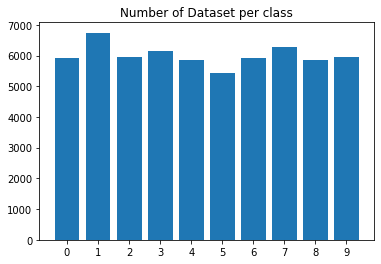

In [13]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')
plt.show()

### pillow로 열기

In [14]:
image_pil = Image.open(path)
image = np.array(image_pil)
image.shape

(28, 28)

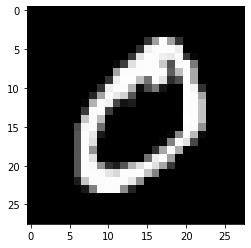

In [15]:
plt.imshow(image, 'gray')
plt.show()

In [16]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)
image.shape

TensorShape([28, 28, 1])

### Label 얻기

In [18]:
path

'dataset/mnist_png/training/0/1.png'

In [23]:
label = path.split('/')[-2]
label = int(label)

In [24]:
def get_label(path):
    class_name = path.split('/')[-2]
    label = int(class_name)
    return label

In [25]:
path, get_label(path)

('dataset/mnist_png/training/0/1.png', 0)

### 데이터 이미지 사이즈 알기

In [37]:
from tqdm import tqdm

In [27]:
heights = []
widths = []

In [28]:
data_paths[:10]

['dataset/mnist_png/training/0/1.png',
 'dataset/mnist_png/training/0/1000.png',
 'dataset/mnist_png/training/0/10005.png',
 'dataset/mnist_png/training/0/10010.png',
 'dataset/mnist_png/training/0/10022.png',
 'dataset/mnist_png/training/0/10025.png',
 'dataset/mnist_png/training/0/10026.png',
 'dataset/mnist_png/training/0/10045.png',
 'dataset/mnist_png/training/0/10069.png',
 'dataset/mnist_png/training/0/10071.png']

In [29]:
len(data_paths)

60000

In [43]:
for path in tqdm(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

100%|██████████| 60000/60000 [01:15<00:00, 796.76it/s]


In [44]:
print(np.unique(heights))
print(np.unique(widths))

[28]
[28]


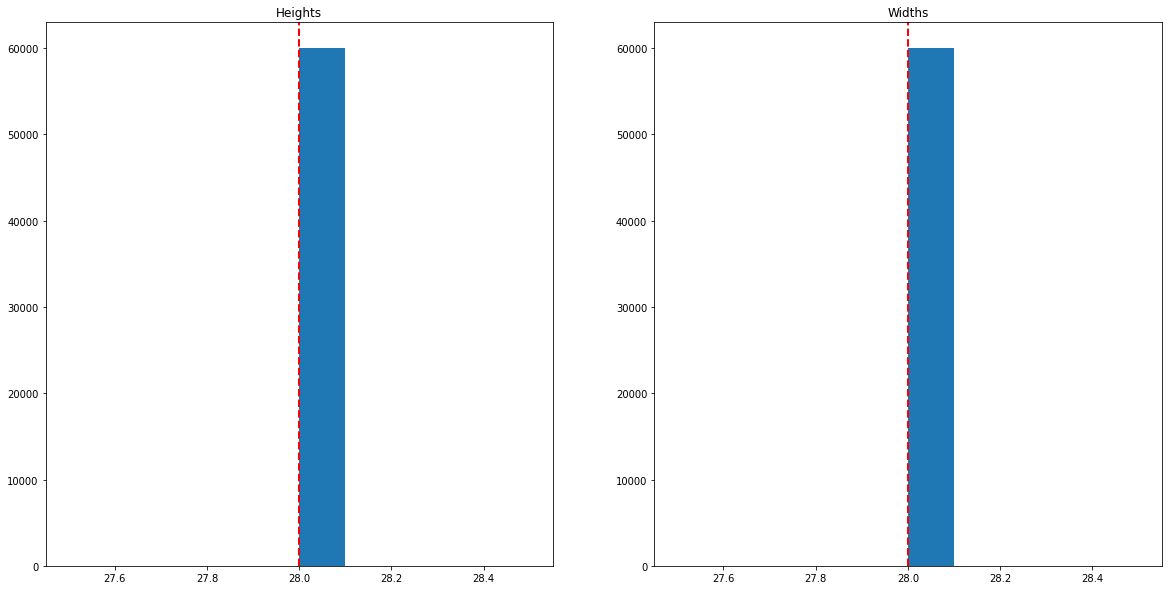

In [45]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

## Data processing

In [46]:
data_paths = glob('dataset/cifar/train/*.png')

In [47]:
os.listdir('dataset/cifar/train/')[0]

'0_frog.png'

In [48]:
path = data_paths[0]
path

'dataset/cifar/train/0_frog.png'

In [49]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype=tf.float32)
image.shape

TensorShape([32, 32, 3])

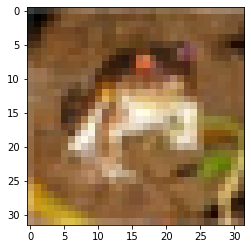

In [51]:
plt.imshow(image)
plt.show()

In [52]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

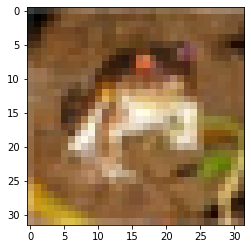

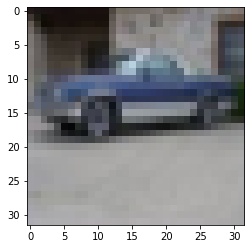

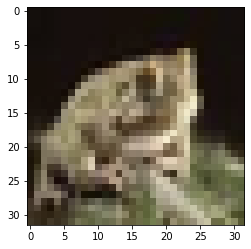

Exception ignored in: <function tqdm.__del__ at 0x7fbbfc6fc950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/std.py", line 1122, in __del__
    self.close()
  File "/usr/local/lib/python3.7/dist-packages/tqdm/notebook.py", line 261, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


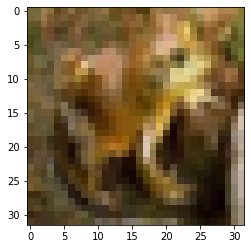

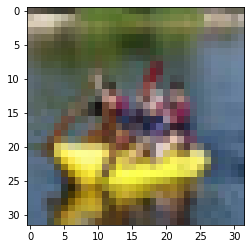

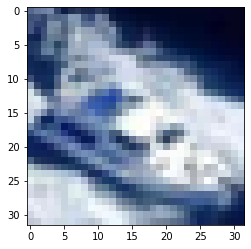

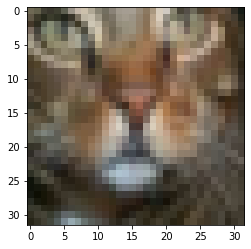

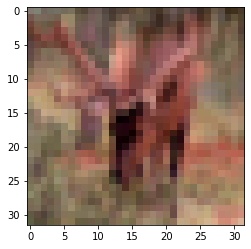

In [53]:
for i in range(8):
    plt.imshow(read_image(data_paths[i]))
    plt.show()

### batch size
- 메모리 문제로 인해

In [54]:
batch_images = []

for path in data_paths[:8]:
    image = read_image(path)
    batch_images.append(image)

In [56]:
len(batch_images)

8

In [58]:
np.array(batch_images).shape

(8, 32, 32, 3)

In [59]:
batch = tf.convert_to_tensor(batch_images)
batch.shape

TensorShape([8, 32, 32, 3])

- batch_size, height, width, channel

In [61]:
def make_batch(batch_paths):
    batch_images = []

    for path in batch_paths[:8]:
        image = read_image(path)
        #image = cv2.resize(image, (32, 32))
        batch_images.append(image)
    return tf.convert_to_tensor(batch_images)

In [63]:
batch_image = make_batch(data_paths[:8])

In [64]:
batch_image.shape

TensorShape([8, 32, 32, 3])